## Feature Engineering (Attempt 1)
#### This attempt focuses on grouping extra columns together to reduce the dimensionality of the demographic data from ACS.

### This file is primarily for the purpose of feature engineering to produce a final clean dataframe with all values from ACS and ZRI together. Data generated here will be used for the purpose of training the models.

In [130]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
%matplotlib inline
from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./utility-vista-307720-6cec755818c9.json"
client = bigquery.Client()
%load_ext google.cloud.bigquery


The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


### Extracting data from years 2015-2017 from Google BigQuery

In [131]:


%%bigquery acs_zip_codes_2015_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:02<00:00, 59.06rows/s]


In [132]:
%%bigquery acs_zip_codes_2016_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2016_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:02<00:00, 62.43rows/s]


In [133]:
%%bigquery acs_zip_codes_2017_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2017_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:02<00:00, 62.49rows/s]


In [134]:
acs_zip_codes_2015_5yr["Year"]=2015
acs_zip_codes_2016_5yr["Year"]=2016
acs_zip_codes_2017_5yr["Year"]=2017

In [135]:
acs_cols_2015=acs_zip_codes_2015_5yr.columns
acs_cols_2016=acs_zip_codes_2016_5yr.columns
acs_cols_2017=acs_zip_codes_2017_5yr.columns

In [136]:
acs_cols_2017.tolist().index('pop_separated')

248

In [137]:
common_columns=list((((
(set(acs_cols_2015))).intersection(set(acs_cols_2016)))
                    .intersection(set(acs_cols_2017))))

In [138]:
frames=[acs_zip_codes_2015_5yr[common_columns],
        acs_zip_codes_2016_5yr[common_columns],
        acs_zip_codes_2017_5yr[common_columns]]
acs_all_phoenix=pd.concat(frames)

In [140]:
acs_all_phoenix.head()
acs_all_phoenix.shape

(390, 247)

#### Calculating the extent of missingness in the data we have collected from 2015-2017

In [141]:
missingRowsACS = pd.isnull(acs_all_phoenix).sum(axis=1) > 0
missingColsACS = pd.isnull(acs_all_phoenix).sum(axis=0) > 0
print(missingColsACS.sum())
print(missingRowsACS.sum())

8
268


In [142]:
#Drop columns that have missing data for 2 or more zipcodes
for col in acs_all_phoenix.columns[missingColsACS]:
    if pd.isnull(acs_all_phoenix[col]).sum()>=0: 
        print(f"Dropping {col} from ACS")
        acs_all_phoenix.drop(col,axis=1,inplace=True)

Dropping pop_5_years_over from ACS
Dropping median_rent from ACS
Dropping aggregate_travel_time_to_work from ACS
Dropping renter_occupied_housing_units_paying_cash_median_gross_rent from ACS
Dropping speak_only_english_at_home from ACS
Dropping percent_income_spent_on_rent from ACS
Dropping speak_spanish_at_home from ACS
Dropping speak_spanish_at_home_low_english from ACS


In [143]:
acs_all_phoenix.shape

(390, 239)

In [144]:
acs_all_phoenix.isnull().sum()

two_parent_families_with_young_children                           0
asian_male_55_64                                                  0
workers_16_and_over                                               0
female_80_to_84                                                   0
dwellings_50_or_more_units                                        0
civilian_labor_force                                              0
female_22_to_24                                                   0
male_40_to_44                                                     0
commute_35_44_mins                                                0
in_grades_5_to_8                                                  0
employed_pop                                                      0
male_80_to_84                                                     0
rent_over_50_percent                                              0
amerindian_including_hispanic                                     0
male_67_to_69                                   

In [145]:
acs_all_phoenix = acs_all_phoenix.reindex(sorted(acs_all_phoenix.columns), axis=1)

In [146]:
acs_all_phoenix.columns.tolist()

['Year',
 'amerindian_including_hispanic',
 'amerindian_pop',
 'armed_forces',
 'asian_including_hispanic',
 'asian_male_45_54',
 'asian_male_55_64',
 'asian_pop',
 'associates_degree',
 'bachelors_degree',
 'bachelors_degree_2',
 'bachelors_degree_or_higher_25_64',
 'black_including_hispanic',
 'black_male_45_54',
 'black_male_55_64',
 'black_pop',
 'children',
 'children_in_single_female_hh',
 'civilian_labor_force',
 'commute_10_14_mins',
 'commute_15_19_mins',
 'commute_20_24_mins',
 'commute_25_29_mins',
 'commute_30_34_mins',
 'commute_35_39_mins',
 'commute_35_44_mins',
 'commute_40_44_mins',
 'commute_45_59_mins',
 'commute_5_9_mins',
 'commute_60_89_mins',
 'commute_60_more_mins',
 'commute_90_more_mins',
 'commute_less_10_mins',
 'commuters_16_over',
 'commuters_by_bus',
 'commuters_by_car_truck_van',
 'commuters_by_carpool',
 'commuters_by_public_transportation',
 'commuters_by_subway_or_elevated',
 'commuters_drove_alone',
 'different_house_year_ago_different_city',
 'diffe

#### Grouping female age columns together

In [147]:
female_under_18 = acs_all_phoenix.female_under_5 + acs_all_phoenix.female_5_to_9 + acs_all_phoenix.female_10_to_14 + acs_all_phoenix.female_15_to_17 + acs_all_phoenix.female_18_to_19
female_under_60 = acs_all_phoenix.female_20 + acs_all_phoenix.female_21 + acs_all_phoenix.female_22_to_24 + acs_all_phoenix.female_25_to_29 + acs_all_phoenix.female_30_to_34 + acs_all_phoenix.female_35_to_39 + acs_all_phoenix.female_40_to_44 + acs_all_phoenix.female_45_to_49 + acs_all_phoenix.female_50_to_54 + acs_all_phoenix.female_55_to_59 
female_over_60 = acs_all_phoenix.female_60_to_61 + acs_all_phoenix.female_62_to_64 + acs_all_phoenix.female_65_to_66 + acs_all_phoenix.female_67_to_69 + acs_all_phoenix.female_70_to_74 + acs_all_phoenix.female_75_to_79 + acs_all_phoenix.female_80_to_84 + acs_all_phoenix.female_85_and_over

In [148]:
female_under_18 = female_under_18.astype(float)
female_under_60 = female_under_60.astype(float)
female_over_60 = female_over_60.astype(float)

#### Grouping male age columns together

In [149]:
male_under_18 = acs_all_phoenix.male_under_5 + acs_all_phoenix.male_5_to_9 + acs_all_phoenix.male_10_to_14 + acs_all_phoenix.male_15_to_17 + acs_all_phoenix.male_18_to_19
male_under_60 = acs_all_phoenix.male_20 + acs_all_phoenix.male_21 + acs_all_phoenix.male_22_to_24 + acs_all_phoenix.male_25_to_29 + acs_all_phoenix.male_30_to_34 + acs_all_phoenix.male_35_to_39 + acs_all_phoenix.male_40_to_44 + acs_all_phoenix.male_45_to_49 + acs_all_phoenix.male_50_to_54 + acs_all_phoenix.male_55_to_59 
male_over_60 = acs_all_phoenix.male_60_61 + acs_all_phoenix.male_62_64 + acs_all_phoenix.male_65_to_66 + acs_all_phoenix.male_67_to_69 + acs_all_phoenix.male_70_to_74 + acs_all_phoenix.male_75_to_79 + acs_all_phoenix.male_80_to_84 + acs_all_phoenix.male_85_and_over

In [150]:
male_under_18 = male_under_18.astype(float)
male_under_60 = male_under_60.astype(float)
male_over_60 = male_over_60.astype(float)

#### Grouping rent affordability columns together

In [151]:
under10 = acs_all_phoenix.rent_under_10_percent
tento50 = acs_all_phoenix.rent_40_to_50_percent + acs_all_phoenix.rent_35_to_40_percent + acs_all_phoenix.rent_30_to_35_percent+ acs_all_phoenix.rent_25_to_30_percent + acs_all_phoenix.rent_20_to_25_percent + acs_all_phoenix.rent_15_to_20_percent + acs_all_phoenix.rent_10_to_15_percent
over50 = acs_all_phoenix.rent_over_50_percent
uncomputed = acs_all_phoenix.rent_burden_not_computed

In [152]:
rent_under10 = under10.astype(float)
rent_tento50 = tento50.astype(float)
rent_over50 = over50.astype(float)
rent_uncomputed = uncomputed.astype(float)

#### Grouping dwellings columns together

In [153]:
small_dwellings = acs_all_phoenix.dwellings_1_units_attached + acs_all_phoenix.dwellings_1_units_detached + acs_all_phoenix.dwellings_2_units + acs_all_phoenix.dwellings_3_to_4_units + acs_all_phoenix.dwellings_5_to_9_units
large_dwellings = acs_all_phoenix.dwellings_10_to_19_units + acs_all_phoenix.dwellings_20_to_49_units + acs_all_phoenix.dwellings_50_or_more_units

In [154]:
small_dwellings = small_dwellings.astype(float)
large_dwellings = large_dwellings.astype(float)

#### Grouping commute time together

In [155]:
commute_less_than_30 = acs_all_phoenix.commute_5_9_mins + acs_all_phoenix.commute_less_10_mins + acs_all_phoenix.commute_10_14_mins + acs_all_phoenix.commute_15_19_mins + acs_all_phoenix.commute_20_24_mins + acs_all_phoenix.commute_25_29_mins
commute_less_than_60 = acs_all_phoenix.commute_30_34_mins + acs_all_phoenix.commute_35_39_mins + acs_all_phoenix.commute_35_44_mins + acs_all_phoenix.commute_40_44_mins + acs_all_phoenix.commute_45_59_mins
commute_over_60 = acs_all_phoenix.commute_60_89_mins + acs_all_phoenix.commute_60_more_mins + acs_all_phoenix.commute_90_more_mins

In [156]:
commute_less_than_30 = commute_less_than_30.astype(float)
commute_less_than_60 = commute_less_than_60.astype(float)
commute_over_60 = commute_over_60.astype(float)

#### Grouping income levels together

In [157]:
income_less_than_60000 = acs_all_phoenix.income_less_10000 + acs_all_phoenix.income_10000_14999 + acs_all_phoenix.income_15000_19999 + acs_all_phoenix.income_20000_24999 + acs_all_phoenix.income_25000_29999 + acs_all_phoenix.income_30000_34999 + acs_all_phoenix.income_35000_39999 + acs_all_phoenix.income_40000_44999 + acs_all_phoenix.income_45000_49999 + acs_all_phoenix.income_50000_59999
income_less_than_125000 = acs_all_phoenix.income_60000_74999 + acs_all_phoenix.income_75000_99999 + acs_all_phoenix.income_100000_124999
income_over_125000 = acs_all_phoenix.income_125000_149999 + acs_all_phoenix.income_150000_199999 + acs_all_phoenix.income_200000_or_more

In [158]:
income_less_than_60000 = income_less_than_60000.astype(float)
income_less_than_125000 = income_less_than_125000.astype(float)
income_over_125000 = income_over_125000.astype(float)

#### Grouping employment industries together

In [159]:
employed_creative = acs_all_phoenix.employed_arts_entertainment_recreation_accommodation_food
employed_prof = acs_all_phoenix.employed_education_health_social + acs_all_phoenix.employed_finance_insurance_real_estate + acs_all_phoenix.employed_information + acs_all_phoenix.employed_science_management_admin_waste
employed_skill = acs_all_phoenix.employed_manufacturing + acs_all_phoenix.employed_construction + acs_all_phoenix.employed_agriculture_forestry_fishing_hunting_mining
employed_service = acs_all_phoenix.employed_retail_trade + acs_all_phoenix.employed_other_services_not_public_admin + acs_all_phoenix.employed_public_administration + acs_all_phoenix.employed_transportation_warehousing_utilities + acs_all_phoenix.employed_wholesale_trade

#### Choosing family type columns

In [160]:
two_parent_hh = acs_all_phoenix.two_parent_families_with_young_children.astype(float)
one_parent_hh = acs_all_phoenix.one_parent_families_with_young_children.astype(float)

#### Choosing population columns

In [161]:
asian_pop = acs_all_phoenix.asian_pop.astype(float)
asian_including_hispanic = acs_all_phoenix.asian_including_hispanic.astype(float)
black_pop = acs_all_phoenix.black_pop.astype(float)
hispanic_pop = acs_all_phoenix.hispanic_pop.astype(float)
white_pop = acs_all_phoenix.white_pop.astype(float)
amerindian_pop = acs_all_phoenix.amerindian_pop.astype(float)
amerindian_including_hispanic = acs_all_phoenix.amerindian_including_hispanic.astype(float)
other_race_pop = acs_all_phoenix.other_race_pop.astype(float)
two_or_more_races_pop = acs_all_phoenix.other_race_pop.astype(float)
not_hispanic_pop = acs_all_phoenix.not_hispanic_pop.astype(float)
not_us_citizen_pop = acs_all_phoenix.not_us_citizen_pop.astype(float)
total_pop = acs_all_phoenix.total_pop.astype(float)

In [162]:
pop_columns = [asian_pop, amerindian_pop, black_pop, hispanic_pop, white_pop, amerindian_including_hispanic,other_race_pop,two_or_more_races_pop]

In [163]:
print(asian_pop.sum()+amerindian_pop.sum()+black_pop.sum()+hispanic_pop.sum()+white_pop.sum()+amerindian_including_hispanic.sum()+other_race_pop.sum()+two_or_more_races_pop.sum())
print(total_pop.sum())
print(not_hispanic_pop.sum()+hispanic_pop.sum())

12758902.0
12789262.0
12789262.0


#### Grouping education level columns together

In [164]:
college_educated = acs_all_phoenix.in_undergrad_college + acs_all_phoenix.some_college_and_associates_degree + acs_all_phoenix.associates_degree + acs_all_phoenix.bachelors_degree + acs_all_phoenix.bachelors_degree_2 +acs_all_phoenix.bachelors_degree_or_higher_25_64 + acs_all_phoenix.masters_degree + acs_all_phoenix.graduate_professional_degree + acs_all_phoenix.one_year_more_college     
in_school = acs_all_phoenix.in_grades_1_to_4 + acs_all_phoenix.in_grades_5_to_8 + acs_all_phoenix.in_grades_9_to_12
inschoolcheck = acs_all_phoenix.in_school
less_than_college_educated = acs_all_phoenix.less_one_year_college + + acs_all_phoenix.less_one_year_college
high_school_educated = acs_all_phoenix.high_school_diploma + acs_all_phoenix.high_school_including_ged

In [165]:
college_educated = college_educated.astype(float)
in_school = in_school.astype(float)
inschoolcheck = inschoolcheck.astype(float) 
less_than_college_educated = less_than_college_educated.astype(float)
high_school_educated = high_school_educated.astype(float)

In [166]:
print(in_school.sum())
print(inschoolcheck.sum())

2176988.0
3417886.0


#### Grouping commute type columns together

In [167]:
public_commute = acs_all_phoenix.commuters_by_public_transportation + acs_all_phoenix.commuters_by_subway_or_elevated + acs_all_phoenix.commuters_by_bus
personal_commute = acs_all_phoenix.commuters_by_car_truck_van + acs_all_phoenix.commuters_by_carpool + acs_all_phoenix.commuters_drove_alone

In [168]:
public_commute = public_commute.astype(float)
personal_commute = personal_commute.astype(float)

#### Choosing housing units columns

In [169]:
vacant_housing_units = acs_all_phoenix.vacant_housing_units.astype(float)
vacant_housing_units_for_rent = acs_all_phoenix.vacant_housing_units_for_rent.astype(float)
vacant_housing_units_for_sale = acs_all_phoenix.vacant_housing_units_for_sale.astype(float)

In [170]:
print(vacant_housing_units.sum())
print(vacant_housing_units_for_rent.sum()+vacant_housing_units_for_sale.sum())

699622.0
225072.0


#### Choosing owner occuppied housing units

In [171]:
owner_occupied_housing_units = acs_all_phoenix.owner_occupied_housing_units.astype(float)
owner_occupied_housing_units_lower_value_quartile = acs_all_phoenix.owner_occupied_housing_units_lower_value_quartile.astype(float)
owner_occupied_housing_units_median_value = acs_all_phoenix.owner_occupied_housing_units_median_value.astype(float)
owner_occupied_housing_units_upper_value_quartile = acs_all_phoenix.owner_occupied_housing_units_upper_value_quartile.astype(float)

#### Choosing employment information

In [172]:
unemployed_pop = acs_all_phoenix.unemployed_pop.astype(float)
employed_pop = acs_all_phoenix.employed_pop.astype(float)

#### Choosing family information

In [173]:
family_households = acs_all_phoenix.family_households.astype(float)
nonfamily_households = acs_all_phoenix.nonfamily_households.astype(float)

#### Choosing remaining miscelleanous columns

In [174]:
Year = acs_all_phoenix.Year.astype(int)
geo_id = acs_all_phoenix.geo_id.astype(int)
gini_index = acs_all_phoenix.gini_index.astype(float)
income_per_capita = acs_all_phoenix.income_per_capita.astype(float)
median_age = acs_all_phoenix.median_age.astype(float)
median_income = acs_all_phoenix.median_income.astype(float)
married_households = acs_all_phoenix.married_households.astype(float)

#### Building the final dataframe for ACS features before combining with ZRI information

In [175]:
dict = {'Year': Year, 'geo_id': geo_id, 'gini_index':gini_index, 'income_per_capita':income_per_capita,
       'median_age':median_age, 'median_income':median_income, 'married_households':married_households,
       'family_households':family_households, 'nonfamily_households':nonfamily_households,
       'unemployed_pop':unemployed_pop, 'employed_pop':employed_pop, 'owner_occupied_housing_units':owner_occupied_housing_units,
       'owner_occupied_housing_units_lower_value_quartile':owner_occupied_housing_units_lower_value_quartile,
       'owner_occupied_housing_units_median_value':owner_occupied_housing_units_median_value,
       'owner_occupied_housing_units_upper_value_quartile':owner_occupied_housing_units_upper_value_quartile,
       'vacant_housing_units':vacant_housing_units,'vacant_housing_units_for_rent':vacant_housing_units_for_rent,
       'vacant_housing_units_for_sale':vacant_housing_units_for_sale, 'public_commute':public_commute,
       'personal_commute':personal_commute, 'college_educated':college_educated, 'in_school':in_school,
       'less_than_college_educated':less_than_college_educated, 'high_school_educated':high_school_educated,
       'asian_pop':asian_pop, 'amerindian_pop':amerindian_pop, 'black_pop':black_pop, 'hispanic_pop':hispanic_pop, 
        'white_pop':white_pop, 'amerindian_including_hispanic':amerindian_including_hispanic,
        'other_race_pop':other_race_pop,'two_or_more_races_pop':two_or_more_races_pop, 'two_parent_hh':two_parent_hh,
       'one_parent_hh':one_parent_hh,'employed_creative':employed_creative, 'employed_prof':employed_prof,
       'employed_skill':employed_skill, 'employed_service':employed_service,'income_less_than_60000':income_less_than_60000,
       'income_less_than_125000':income_less_than_125000, 'income_over_125000':income_over_125000,
       'commute_less_than_30':commute_less_than_30, 'commute_less_than_60':commute_less_than_60,
       'commute_over_60':commute_over_60, 'small_dwellings':small_dwellings, 'large_dwellings':large_dwellings,
       'rent_under10':rent_under10, 'rent_tento50':rent_tento50, 'rent_over50':rent_over50, 'rent_uncomputed':rent_uncomputed,
       'male_under_18':male_under_18, 'male_under_60':male_under_60, 'male_over_60':male_over_60,
       'female_under_18':female_under_18, 'female_under_60':female_under_60, 'female_over_60':female_over_60}

In [176]:
acs_final = pd.DataFrame(dict)

In [177]:
acs_final.shape

(390, 56)

In [178]:
acs_final.head()

,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,amerindian_including_hispanic,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60
0,2015,85003,0.5317,30082.0,37.3,41038.0,957.0,1467.0,2478.0,377.0,4081.0,1247.0,161000.0,288500.0,387000.0,886.0,396.0,58.0,622.0,5658.0,10370.0,986.0,570.0,2343.0,200.0,126.0,992.0,3461.0,4542.0,157.0,7.0,7.0,206.0,372.0,426.000000000,2015.000000000,356.000000000,1284.000000000,2398.0,972.0,575.0,3016.0,1238.0,620.0,2526.0,2283.0,84.0,1845.0,560.0,209.0,935.0,3948.0,682.0,741.0,2538.0,635.0
1,2015,85004,0.5950,31399.0,35.9,30202.0,272.0,500.0,1525.0,194.0,2198.0,577.0,98200.0,238300.0,342300.0,769.0,250.0,225.0,244.0,2586.0,5564.0,223.0,564.0,1394.0,118.0,51.0,337.0,1461.0,2588.0,103.0,0.0,0.0,65.0,94.0,292.000000000,1113.000000000,264.000000000,529.000000000,1384.0,349.0,292.0,1723.0,486.0,110.0,1085.0,1709.0,49.0,1097.0,218.0,84.0,278.0,1782.0,468.0,376.0,1322.0,384.0
2,2015,85262,0.4994,81380.0,55.3,124848.0,3323.0,3568.0,920.0,267.0,4539.0,4134.0,442900.0,649500.0,982400.0,2766.0,88.0,299.0,0.0,6936.0,17548.0,1021.0,924.0,1808.0,466.0,48.0,247.0,118.0,9318.0,48.0,0.0,0.0,320.0,72.0,242.000000000,2444.000000000,731.000000000,1122.000000000,915.0,1333.0,2240.0,1232.0,2507.0,912.0,7254.0,0.0,0.0,307.0,13.0,34.0,884.0,2081.0,2439.0,603.0,2435.0,1943.0
3,2015,85118,0.4580,43175.0,63.7,62715.0,3830.0,4074.0,1612.0,423.0,3589.0,4969.0,156400.0,245500.0,351200.0,2608.0,88.0,11.0,0.0,5878.0,15431.0,711.0,2422.0,5063.0,248.0,8.0,93.0,639.0,10759.0,8.0,0.0,0.0,138.0,23.0,280.000000000,1573.000000000,737.000000000,999.000000000,2773.0,1835.0,1078.0,1667.0,1600.0,642.0,7214.0,0.0,0.0,508.0,75.0,134.0,491.0,1900.0,3423.0,490.0,2023.0,3530.0
4,2015,85631,0.3618,17884.0,33.9,43629.0,658.0,975.0,343.0,299.0,1341.0,918.0,56800.0,73600.0,94600.0,298.0,38.0,0.0,2.0,2476.0,2892.0,830.0,382.0,1373.0,0.0,0.0,2.0,2343.0,1680.0,0.0,0.0,0.0,260.0,166.0,77.000000000,442.000000000,448.000000000,374.000000000,806.0,465.0,47.0,509.0,440.0,1118.0,1406.0,38.0,0.0,312.0,36.0,52.0,815.0,715.0,432.0,573.0,1000.0,507.0


<AxesSubplot:>

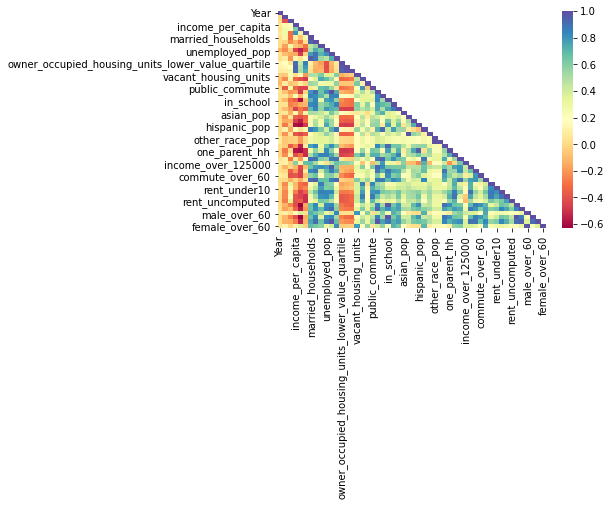

In [179]:
import seaborn as sns
corr_df =  acs_final.corr(method='pearson') 

df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))

hmap=sns.heatmap(df_lt,cmap="Spectral")
hmap

In [180]:
x_std=acs_final.astype(float)
for col in x_std.columns:
     x_std[col]=(x_std[col]-x_std[col].mean())/x_std[col].std()
x_std.sample(2)

,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,amerindian_including_hispanic,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60
47,0.0,1.004424,-1.246438,-0.886578,-0.995908,-0.454837,-0.162591,0.014845,-0.627815,0.094576,-0.045598,-0.269243,-0.704412,-0.768013,-0.849209,-0.504644,-0.378728,-0.420547,-0.775237,0.100998,-0.604568,0.537622,-0.247289,0.552548,-0.718778,-0.750076,0.502139,0.579123,-0.417991,-0.422410,0.473324,0.473324,0.419327,0.662330,0.116898,-0.048237,0.011426,-0.136072,-0.054052,-0.096751,-0.891717,-0.302608,0.390793,0.458633,-0.111898,-0.798523,-0.089695,-0.148293,-0.221979,-0.632734,0.557047,-0.010330,-0.584756,0.556970,0.056493,-0.601611
119,0.0,0.464441,0.971143,1.871942,0.686731,0.857290,0.776440,0.473072,1.405786,-0.220793,0.610552,0.820731,1.637317,1.548196,1.741102,1.107202,0.513368,-0.762338,-0.423922,0.500182,1.544253,-0.190428,-0.333782,-0.491595,0.797982,-0.741828,-0.780996,-0.718832,1.229597,-0.772603,-0.360068,-0.360068,-0.019491,-0.747949,0.423028,1.333260,-0.313796,-0.054174,0.086360,0.994670,2.350977,0.762850,0.229510,-0.782184,0.921883,1.481681,1.949991,0.993627,0.329554,-0.212921,-0.293079,0.219504,0.838915,-0.320301,0.374862,1.037104


In [181]:
for col in acs_final.columns:
    print(col)

Year
geo_id
gini_index
income_per_capita
median_age
median_income
married_households
family_households
nonfamily_households
unemployed_pop
employed_pop
owner_occupied_housing_units
owner_occupied_housing_units_lower_value_quartile
owner_occupied_housing_units_median_value
owner_occupied_housing_units_upper_value_quartile
vacant_housing_units
vacant_housing_units_for_rent
vacant_housing_units_for_sale
public_commute
personal_commute
college_educated
in_school
less_than_college_educated
high_school_educated
asian_pop
amerindian_pop
black_pop
hispanic_pop
white_pop
amerindian_including_hispanic
other_race_pop
two_or_more_races_pop
two_parent_hh
one_parent_hh
employed_creative
employed_prof
employed_skill
employed_service
income_less_than_60000
income_less_than_125000
income_over_125000
commute_less_than_30
commute_less_than_60
commute_over_60
small_dwellings
large_dwellings
rent_under10
rent_tento50
rent_over50
rent_uncomputed
male_under_18
male_under_60
male_over_60
female_under_18
femal

In [195]:
#initial analysis
kmeans_keep_list=[
    'family_households',
    'nonfamily_households',
    'unemployed_pop,
    'owner_occupied_housing_units',
    'vacant_housing_units',
    'public_commute',
    'personal_commute'
    'college_educated',
    'two_parent_hh',
    'one_parent_hh',
    'public_commute',
    'personal_commute',
    'small_dwellings',
    'large_dwellings',
    
]
#categories to study further
#population, employment, commute_length,rent_burden
#gender age to be separated

households_type=[
'married_households',
'family_households',
'nonfamily_households',
'median_income'
]
employment_status=[
'unemployed_pop',
'employed_pop',
'median_income'
]
housing_unit_types=[
'owner_occupied_housing_units',
'owner_occupied_housing_units_lower_value_quartile',
'owner_occupied_housing_units_median_value',
'owner_occupied_housing_units_upper_value_quartile',
'vacant_housing_units',
'vacant_housing_units_for_rent',
'vacant_housing_units_for_sale',
    'median_income'
]
commute_type=[
'public_commute',
'personal_commute',
        'median_income'


]
education=[
'college_educated',
'in_school',
'less_than_college_educated',
'high_school_educated',
     'median_income'

   
]
pop_category=[
'asian_pop',
'amerindian_pop',
'black_pop',
'hispanic_pop',
'white_pop',
'amerindian_including_hispanic',
'other_race_pop',
'two_or_more_races_pop',
        'median_income'
]

parents_type=[    
'two_parent_hh',
'one_parent_hh',
    'median_income'
]

job_types=[
    'employed_creative',
'employed_prof',
'employed_skill',
'employed_service',
        'median_income'
]

income_cat=[
'income_less_than_60000',
'income_less_than_125000',
'income_over_125000',
    'median_income'

]

commute_length=[
'commute_less_than_30',
'commute_less_than_60',
'commute_over_60',
    'median_income'


]

dwelling_type=[
'small_dwellings',
'large_dwellings',
        'median_income'
]

rent_burden=[
'rent_under10',
'rent_tento50',
'rent_over50',
'rent_uncomputed',
    'median_income'


]

gender_age=[
'male_under_18',
'male_under_60',
'male_over_60',
'female_under_18',
'female_under_60',
'female_over_60',
    'median_income'


]
kmeangroupings=[
    households_type,
    employment_status,
    housing_unit_types,
    commute_type,
    education,
    pop_category,
    parents_type,
    job_types,
    income_cat,
    commute_length,
    dwelling_type,
    rent_burden,
    gender_age
]
kmeanGroupingNames=[
    "Households Type",
    "Employment Status",
    "Housing Unit Types",
    "Commute Type",
    "Education",
    "Population Category",
    "Parents Type",
    "Job Types",
    "Income Category",
    "Cummute Length",
    "Dwelling Type",
    "Rent Burden",
    "Gender and Age"
]

<Figure size 720x720 with 0 Axes>

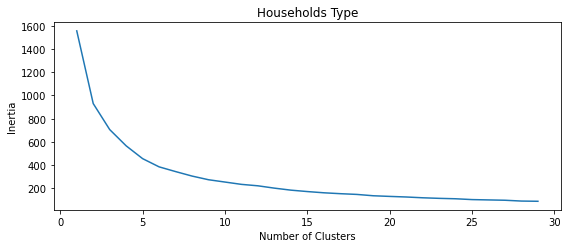

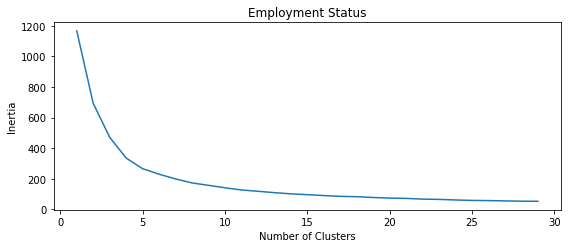

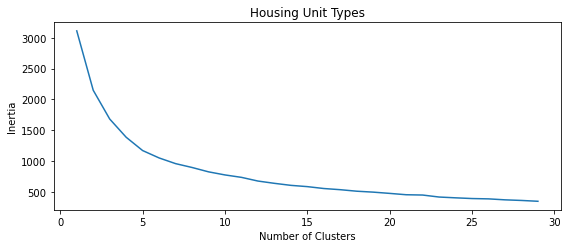

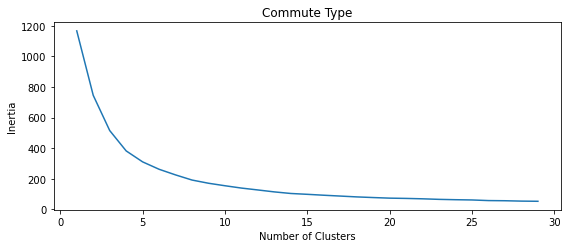

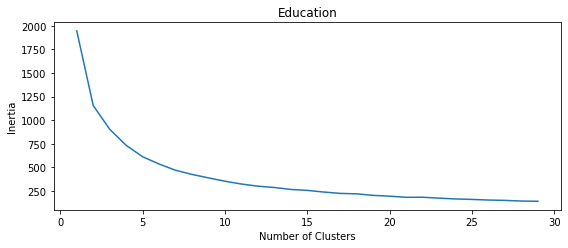

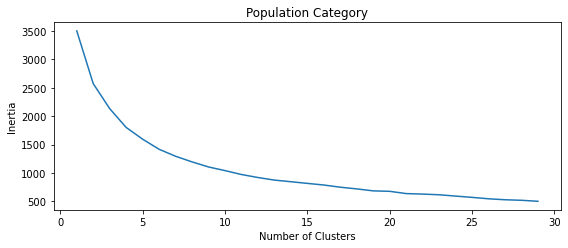

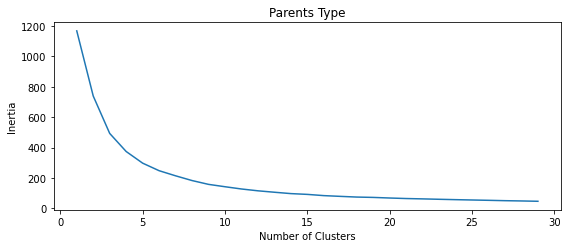

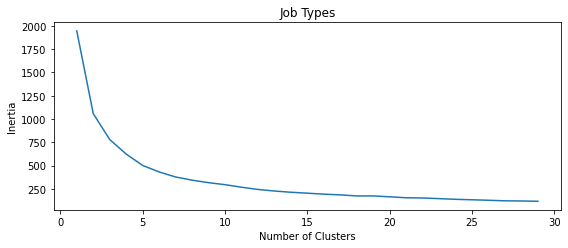

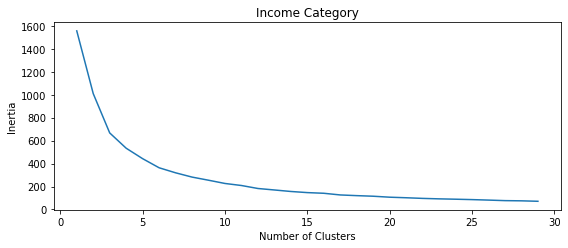

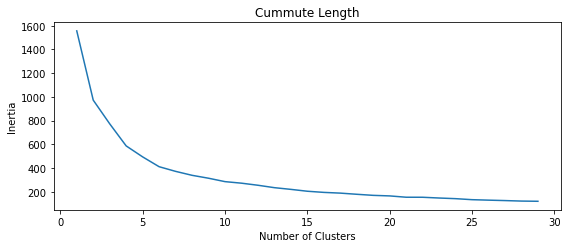

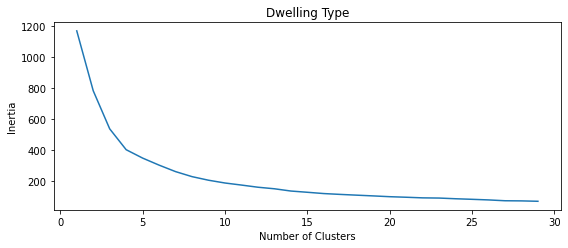

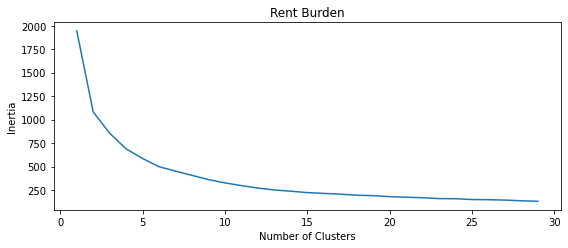

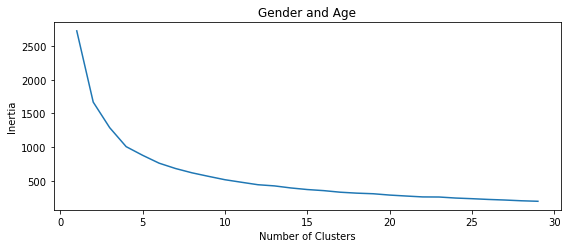

In [206]:
from sklearn.cluster import KMeans
plt.figure(figsize=(10,10))  # change the size of figure!
subplotIdx=0
for idx,name in enumerate(kmeanGroupingNames):
    plt.figure(figsize=(20,20)) 
    inertias=[]
    for i in range (1,30):
        kmeans=KMeans(i)
        kmeans.fit(x_std[kmeangroupings[idx]])
        inertias.append(kmeans.inertia_)
    plt.subplot(5,2, subplotIdx+1)
    plt.title(name)
    plt.plot(range(1,30),inertias)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

Households Type


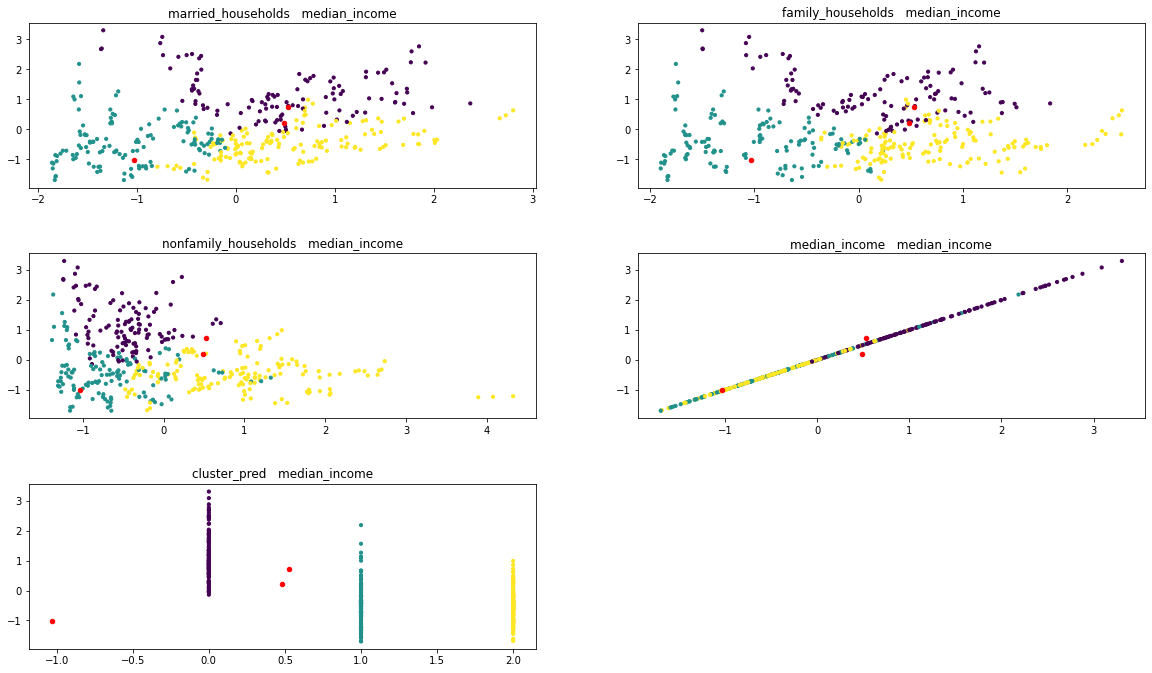

In [218]:
print(kmeanGroupingNames[0])
k_means_new=KMeans(3)
k_means_new.fit(x_std[kmeangroupings[0]])
cluster_new=x_std[kmeangroupings[0]].copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(x_std[kmeangroupings[0]])
cluster_new.shape
plt.figure(figsize=(20,20))  # change the size of figure!
i=0
for col in cluster_new.columns:
    plt.subplot(5,2, i+1)
    plt.title(col+"   "+"median_income")
    centers = k_means_new.cluster_centers_
    plt.scatter(cluster_new[col],cluster_new["median_income"], c=cluster_new["cluster_pred"],s=10)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20);
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    i+=1

Employment Status


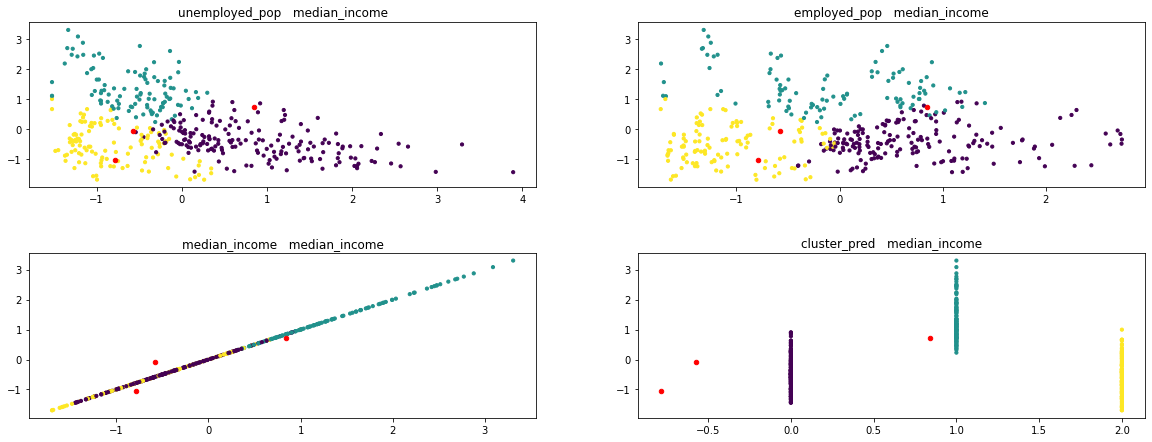

In [219]:
print(kmeanGroupingNames[1])
k_means_new=KMeans(3)
k_means_new.fit(x_std[kmeangroupings[1]])
cluster_new=x_std[kmeangroupings[1]].copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(x_std[kmeangroupings[1]])
cluster_new.shape
plt.figure(figsize=(20,20))  # change the size of figure!
i=0
for col in cluster_new.columns:
    plt.subplot(5,2, i+1)
    plt.title(col+"   "+"median_income")
    centers = k_means_new.cluster_centers_
    plt.scatter(cluster_new[col],cluster_new["median_income"], c=cluster_new["cluster_pred"],s=10)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20);
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    i+=1

Housing Unit Types


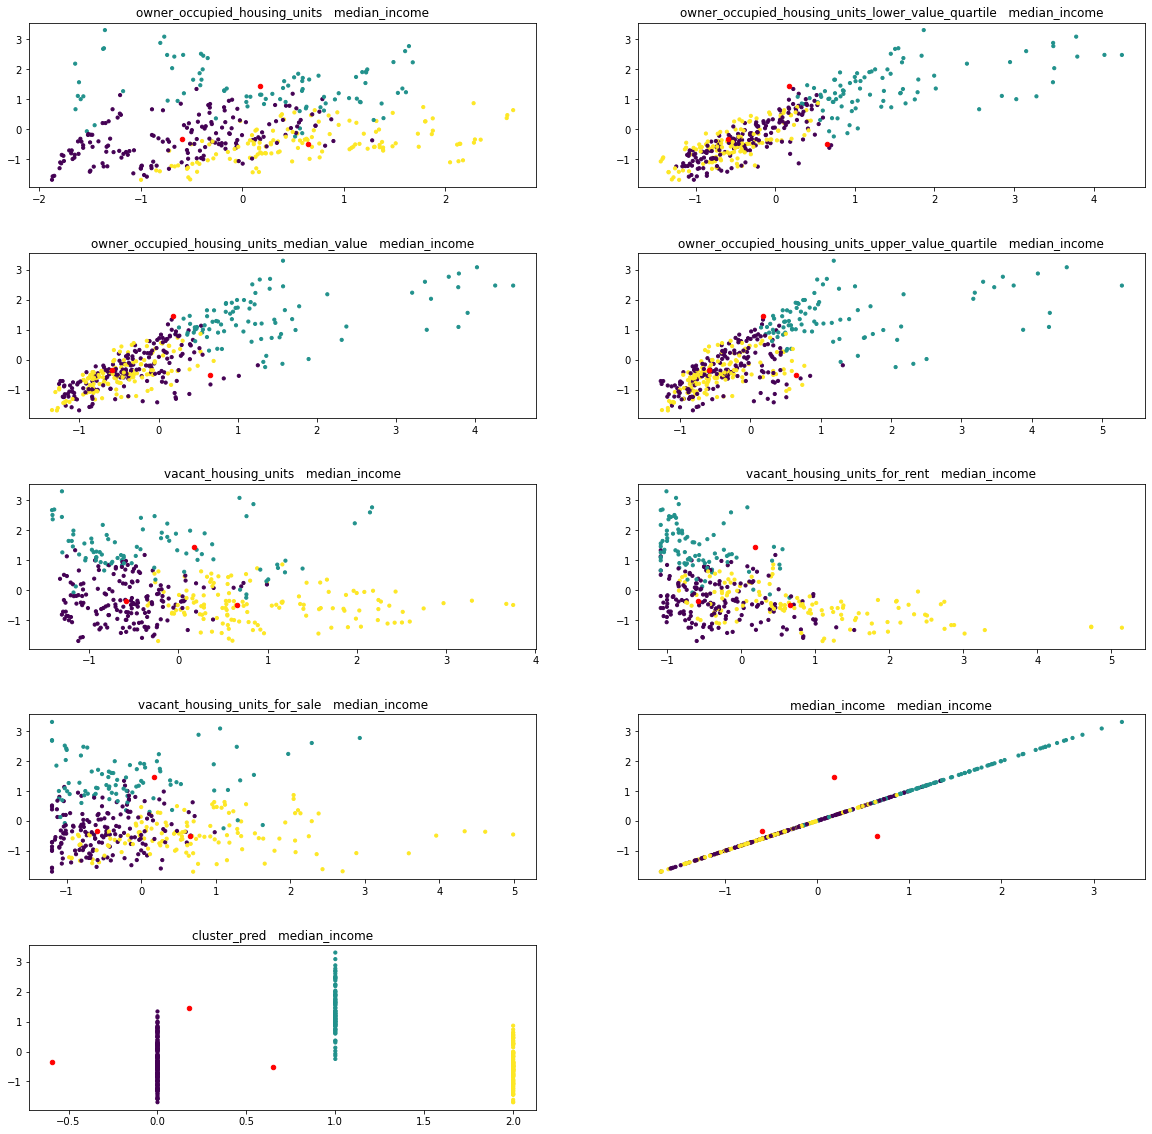

In [220]:
print(kmeanGroupingNames[2])
k_means_new=KMeans(3)
k_means_new.fit(x_std[kmeangroupings[2]])
cluster_new=x_std[kmeangroupings[2]].copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(x_std[kmeangroupings[2]])
cluster_new.shape
plt.figure(figsize=(20,20))  # change the size of figure!
i=0
for col in cluster_new.columns:
    plt.subplot(5,2, i+1)
    plt.title(col+"   "+"median_income")
    centers = k_means_new.cluster_centers_
    plt.scatter(cluster_new[col],cluster_new["median_income"], c=cluster_new["cluster_pred"],s=10)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20);
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    i+=1

Commute Type


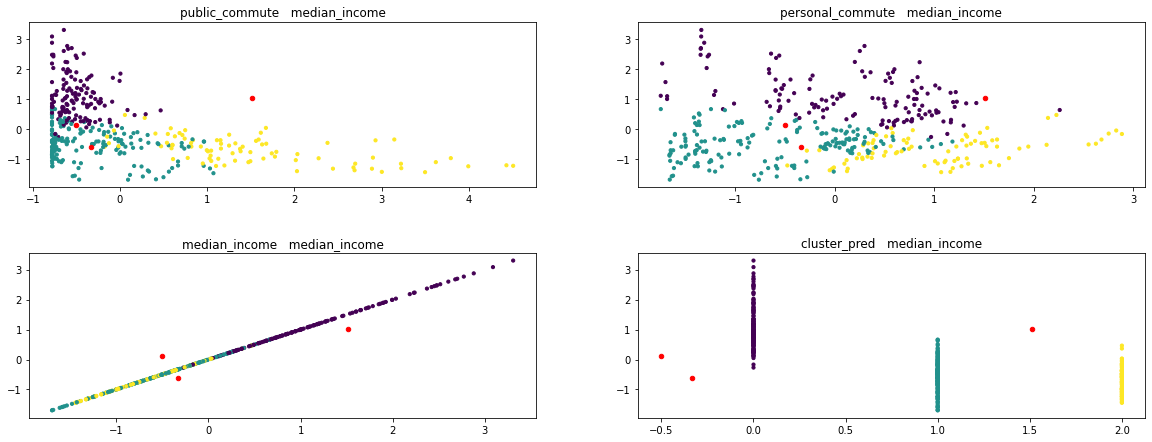

In [221]:
print(kmeanGroupingNames[3])
k_means_new=KMeans(3)
k_means_new.fit(x_std[kmeangroupings[3]])
cluster_new=x_std[kmeangroupings[3]].copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(x_std[kmeangroupings[3]])
cluster_new.shape
plt.figure(figsize=(20,20))  # change the size of figure!
i=0
for col in cluster_new.columns:
    plt.subplot(5,2, i+1)
    plt.title(col+"   "+"median_income")
    centers = k_means_new.cluster_centers_
    plt.scatter(cluster_new[col],cluster_new["median_income"], c=cluster_new["cluster_pred"],s=10)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20);
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    i+=1

Education


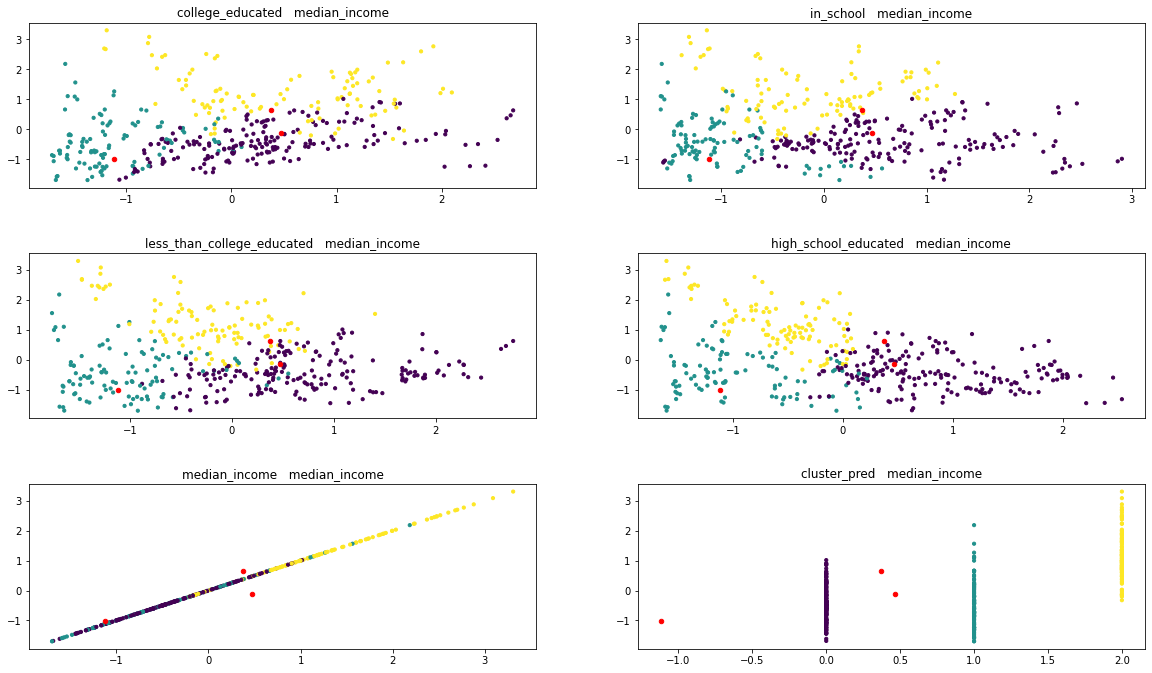

In [222]:
print(kmeanGroupingNames[4])
k_means_new=KMeans(3)
k_means_new.fit(x_std[kmeangroupings[4]])
cluster_new=x_std[kmeangroupings[4]].copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(x_std[kmeangroupings[4]])
cluster_new.shape
plt.figure(figsize=(20,20))  # change the size of figure!
i=0
for col in cluster_new.columns:
    plt.subplot(5,2, i+1)
    plt.title(col+"   "+"median_income")
    centers = k_means_new.cluster_centers_
    plt.scatter(cluster_new[col],cluster_new["median_income"], c=cluster_new["cluster_pred"],s=10)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20);
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    i+=1

Population Category


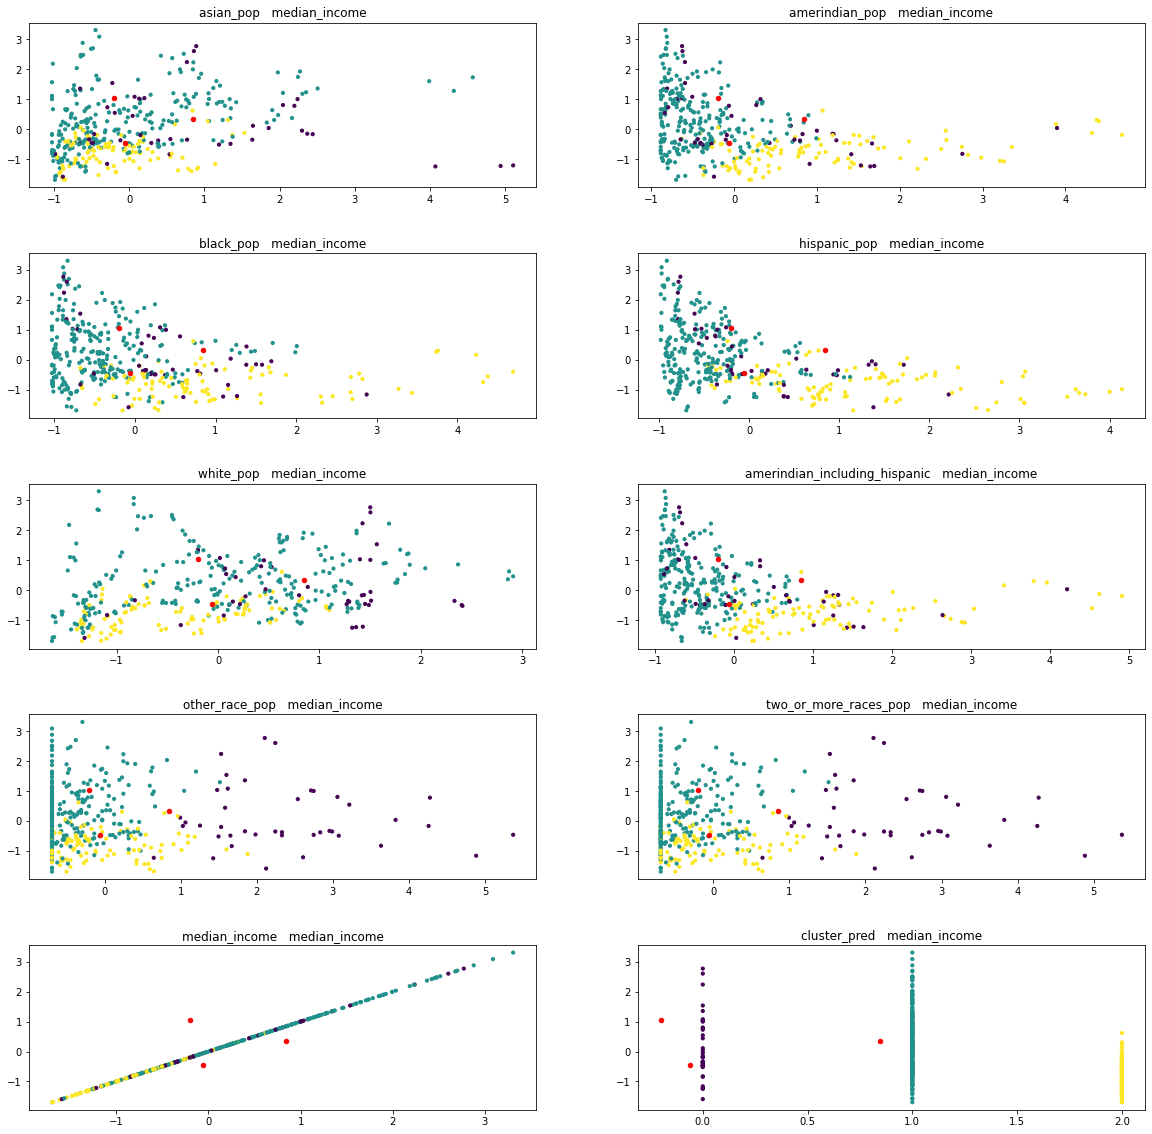

In [223]:
print(kmeanGroupingNames[5])
k_means_new=KMeans(3)
k_means_new.fit(x_std[kmeangroupings[5]])
cluster_new=x_std[kmeangroupings[5]].copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(x_std[kmeangroupings[5]])
cluster_new.shape
plt.figure(figsize=(20,20))  # change the size of figure!
i=0
for col in cluster_new.columns:
    plt.subplot(5,2, i+1)
    plt.title(col+"   "+"median_income")
    centers = k_means_new.cluster_centers_
    plt.scatter(cluster_new[col],cluster_new["median_income"], c=cluster_new["cluster_pred"],s=10)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20);
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    i+=1

Parents Type


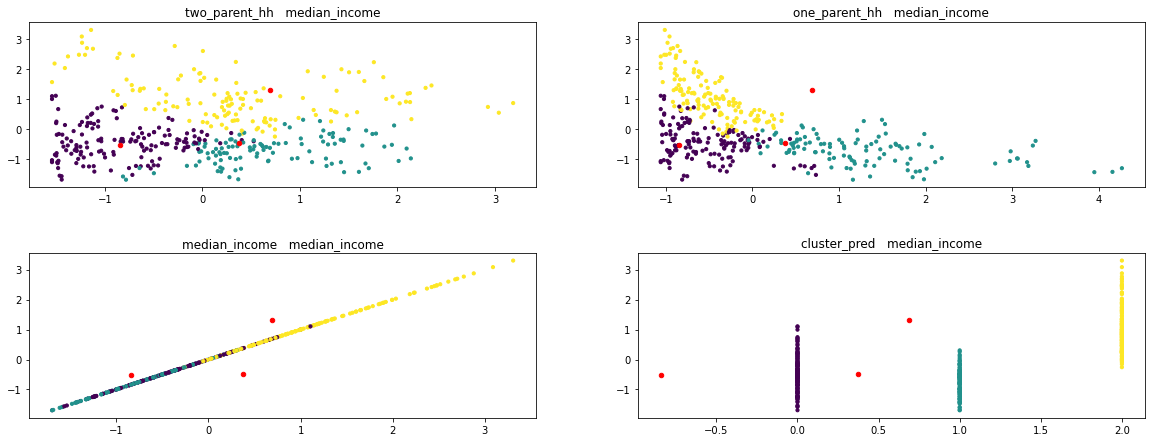

In [224]:
print(kmeanGroupingNames[6])
k_means_new=KMeans(3)
k_means_new.fit(x_std[kmeangroupings[6]])
cluster_new=x_std[kmeangroupings[6]].copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(x_std[kmeangroupings[6]])
cluster_new.shape
plt.figure(figsize=(20,20))  # change the size of figure!
i=0
for col in cluster_new.columns:
    plt.subplot(5,2, i+1)
    plt.title(col+"   "+"median_income")
    centers = k_means_new.cluster_centers_
    plt.scatter(cluster_new[col],cluster_new["median_income"], c=cluster_new["cluster_pred"],s=10)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20);
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    i+=1

Job Types


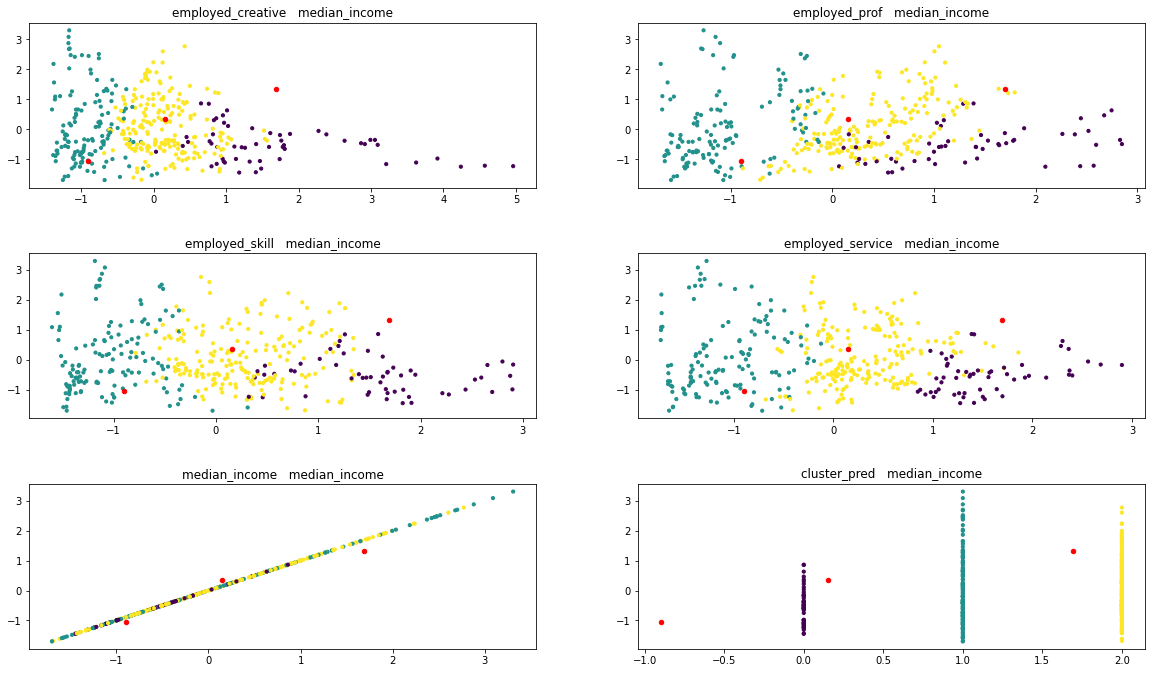

In [225]:
print(kmeanGroupingNames[7])
k_means_new=KMeans(3)
k_means_new.fit(x_std[kmeangroupings[7]])
cluster_new=x_std[kmeangroupings[7]].copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(x_std[kmeangroupings[7]])
cluster_new.shape
plt.figure(figsize=(20,20))  # change the size of figure!
i=0
for col in cluster_new.columns:
    plt.subplot(5,2, i+1)
    plt.title(col+"   "+"median_income")
    centers = k_means_new.cluster_centers_
    plt.scatter(cluster_new[col],cluster_new["median_income"], c=cluster_new["cluster_pred"],s=10)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20);
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    i+=1

Income Category


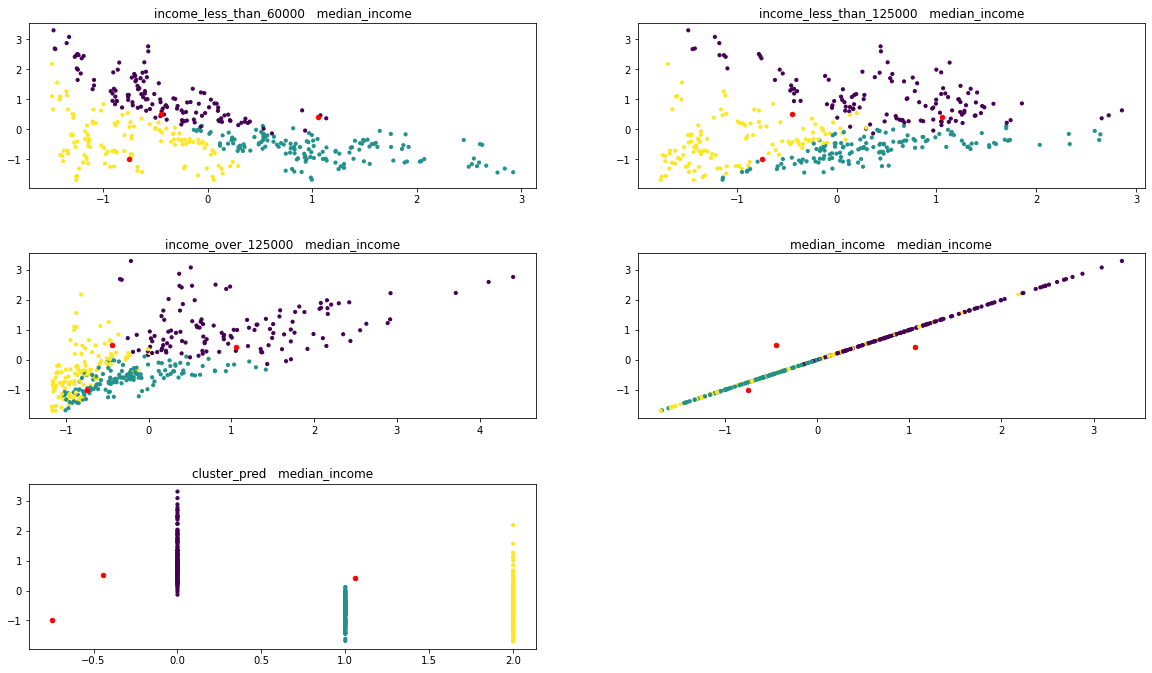

In [226]:
print(kmeanGroupingNames[8])
k_means_new=KMeans(3)
k_means_new.fit(x_std[kmeangroupings[8]])
cluster_new=x_std[kmeangroupings[8]].copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(x_std[kmeangroupings[8]])
cluster_new.shape
plt.figure(figsize=(20,20))  # change the size of figure!
i=0
for col in cluster_new.columns:
    plt.subplot(5,2, i+1)
    plt.title(col+"   "+"median_income")
    centers = k_means_new.cluster_centers_
    plt.scatter(cluster_new[col],cluster_new["median_income"], c=cluster_new["cluster_pred"],s=10)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20);
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    i+=1

Cummute Length


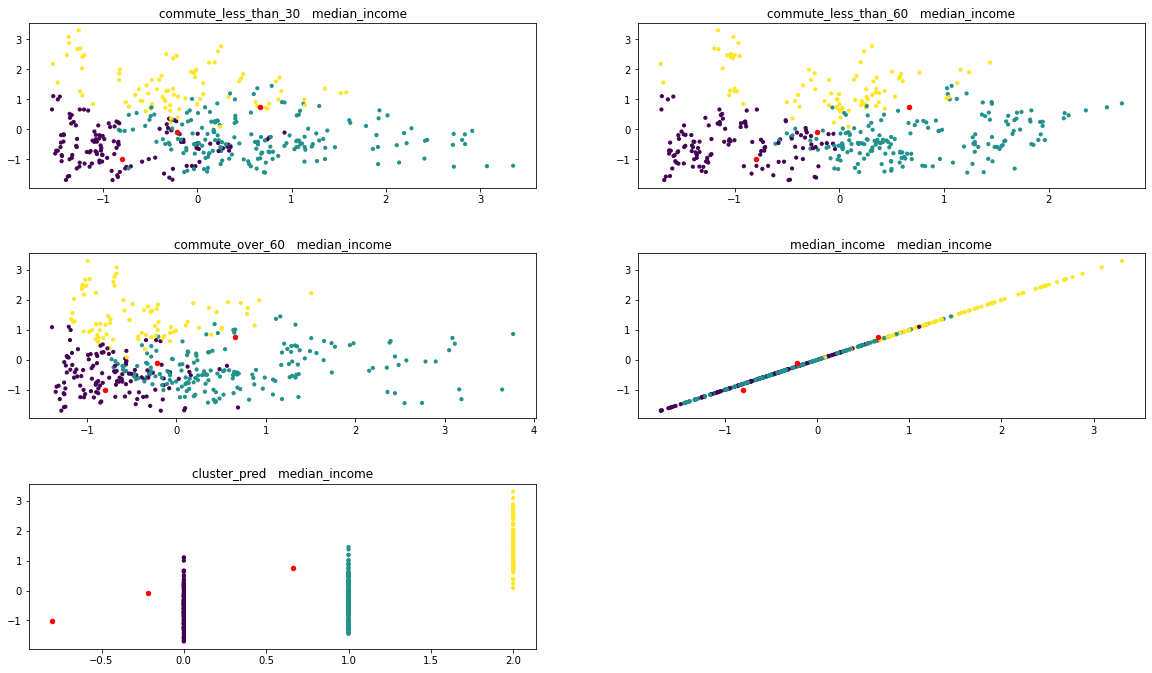

In [227]:
print(kmeanGroupingNames[9])
k_means_new=KMeans(3)
k_means_new.fit(x_std[kmeangroupings[9]])
cluster_new=x_std[kmeangroupings[9]].copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(x_std[kmeangroupings[9]])
cluster_new.shape
plt.figure(figsize=(20,20))  # change the size of figure!
i=0
for col in cluster_new.columns:
    plt.subplot(5,2, i+1)
    plt.title(col+"   "+"median_income")
    centers = k_means_new.cluster_centers_
    plt.scatter(cluster_new[col],cluster_new["median_income"], c=cluster_new["cluster_pred"],s=10)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20);
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    i+=1

Dwelling Type


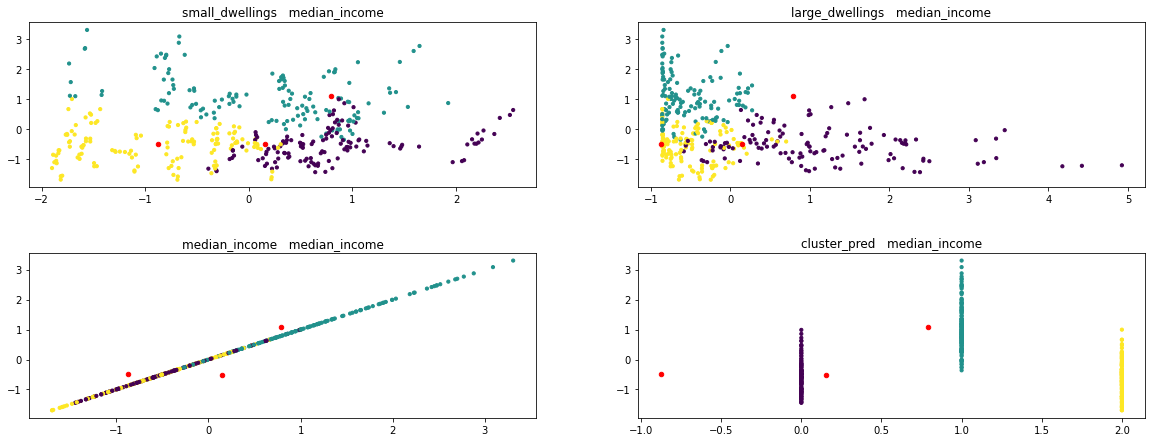

In [228]:
print(kmeanGroupingNames[10])
k_means_new=KMeans(3)
k_means_new.fit(x_std[kmeangroupings[10]])
cluster_new=x_std[kmeangroupings[10]].copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(x_std[kmeangroupings[10]])
cluster_new.shape
plt.figure(figsize=(20,20))  # change the size of figure!
i=0
for col in cluster_new.columns:
    plt.subplot(5,2, i+1)
    plt.title(col+"   "+"median_income")
    centers = k_means_new.cluster_centers_
    plt.scatter(cluster_new[col],cluster_new["median_income"], c=cluster_new["cluster_pred"],s=10)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20);
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    i+=1

Rent Burden


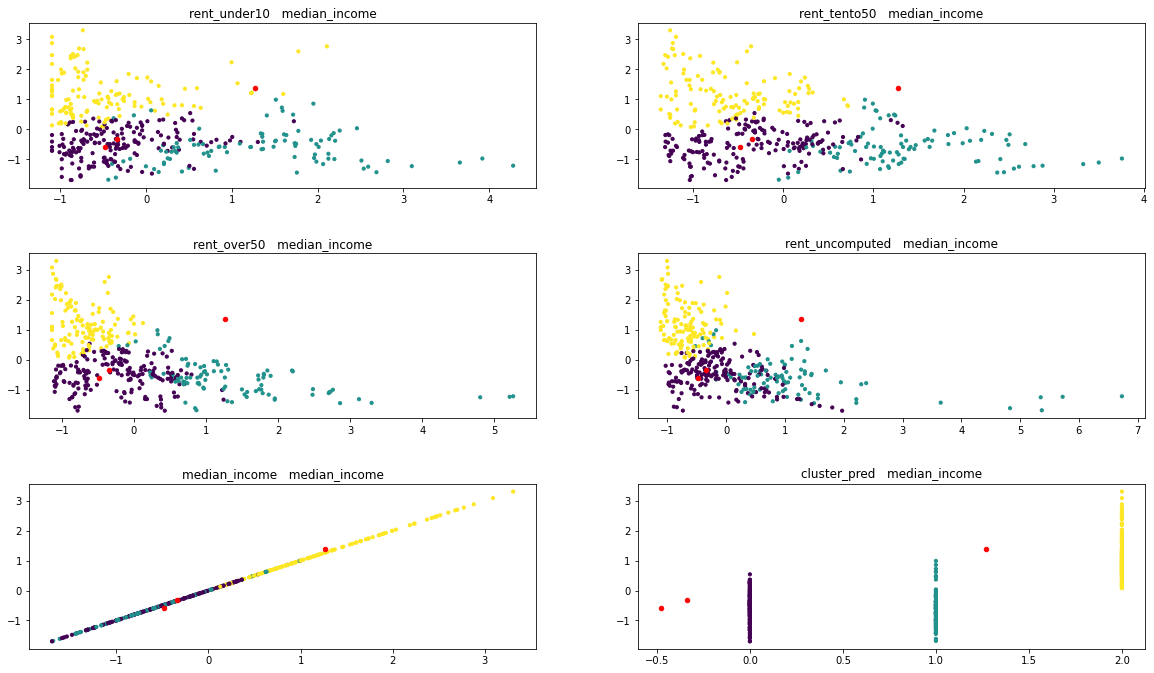

In [229]:
print(kmeanGroupingNames[11])
k_means_new=KMeans(3)
k_means_new.fit(x_std[kmeangroupings[11]])
cluster_new=x_std[kmeangroupings[11]].copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(x_std[kmeangroupings[11]])
cluster_new.shape
plt.figure(figsize=(20,20))  # change the size of figure!
i=0
for col in cluster_new.columns:
    plt.subplot(5,2, i+1)
    plt.title(col+"   "+"median_income")
    centers = k_means_new.cluster_centers_
    plt.scatter(cluster_new[col],cluster_new["median_income"], c=cluster_new["cluster_pred"],s=10)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20);
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    i+=1

Gender and Age


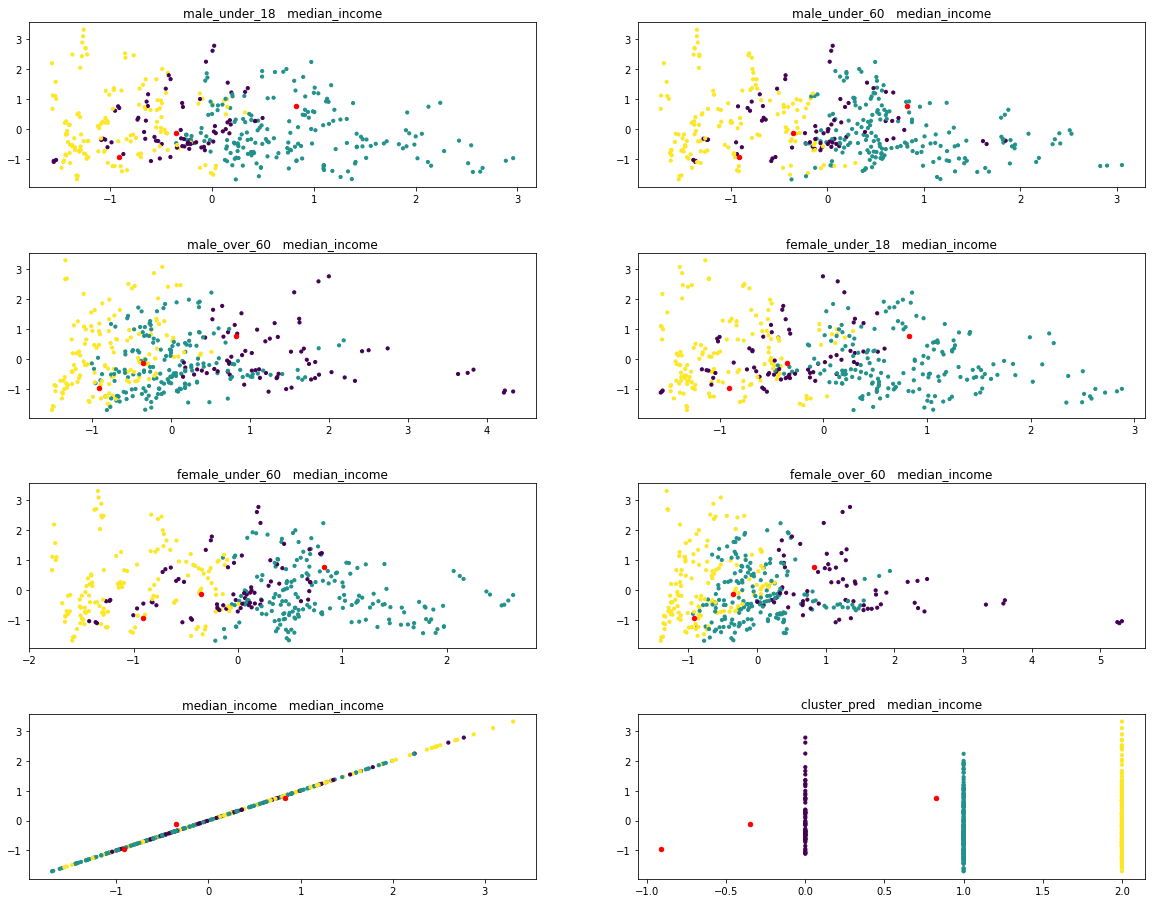

In [230]:
print(kmeanGroupingNames[12])
k_means_new=KMeans(3)
k_means_new.fit(x_std[kmeangroupings[12]])
cluster_new=x_std[kmeangroupings[12]].copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(x_std[kmeangroupings[12]])
cluster_new.shape
plt.figure(figsize=(20,20))  # change the size of figure!
i=0
for col in cluster_new.columns:
    plt.subplot(5,2, i+1)
    plt.title(col+"   "+"median_income")
    centers = k_means_new.cluster_centers_
    plt.scatter(cluster_new[col],cluster_new["median_income"], c=cluster_new["cluster_pred"],s=10)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20);
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    i+=1

In [185]:
zriall=pd.read_csv("C:/Users/ykath/Downloads/Zip_Zri_AllHomesPlusMultifamily.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/ykath/Downloads/Zip_Zri_AllHomesPlusMultifamily.csv'

In [ ]:
zriall.rename(columns={"RegionName":"zipcode"},inplace=True)

In [ ]:
missingMetros = pd.isnull(zriall["Metro"])
zriall=zriall[~missingMetros]